In [36]:
import matplotlib.pyplot as plt

import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rc('font', family='GULIM')

In [37]:
pred1=pd.read_csv('Files/BiLSTM/additionalX_BZ.csv', index_col=0)
pred2=pd.read_csv('Files/BiLSTM/additionalX_BZ_vecO.csv', index_col=0)

In [42]:
pred1

,Predictions,Ground Truths
Date,,
2023-02-02,0.021801,0.014666
2023-02-03,0.021809,0.007150
2023-02-06,0.021776,0.009399
2023-02-07,0.021714,0.015500
2023-02-08,0.021619,0.024696
...,...,...
2024-03-22,0.021489,0.012541
2024-03-25,0.021507,0.012731
2024-03-26,0.021501,0.011823


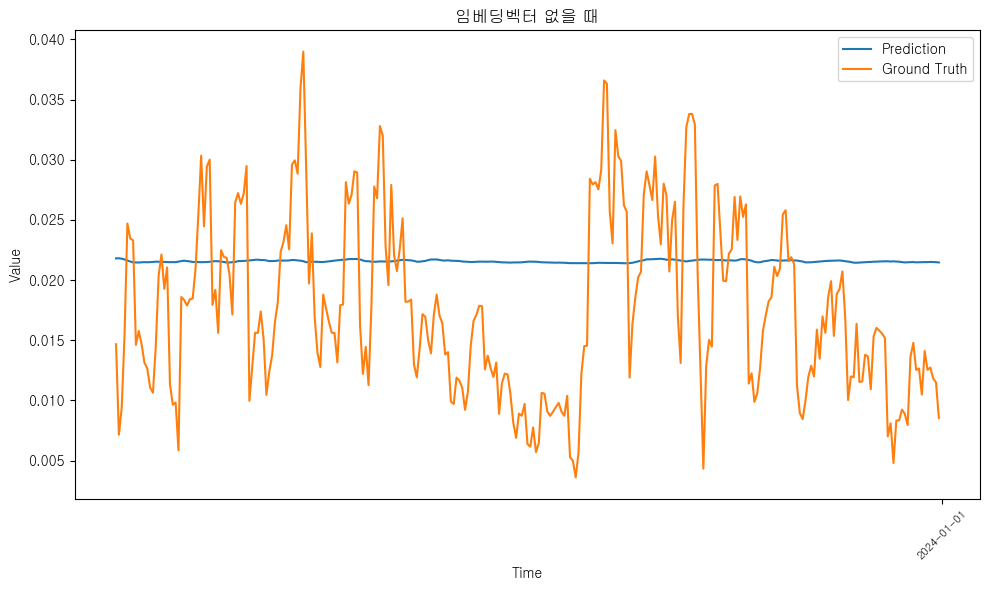

In [40]:
plt.figure(figsize=(10,6))

plt.plot( pred1['Predictions'], label='Prediction')
plt.plot( pred1['Ground Truths'],label='Ground Truth')
plt.title('임베딩벡터 없을 때')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45, fontsize=8)
plt.xticks(pd.date_range(start=pred1.index.min(), end=pred1.index.max(), freq='1YS').strftime('%Y-%m-%d'))
plt.tight_layout()
plt.show()

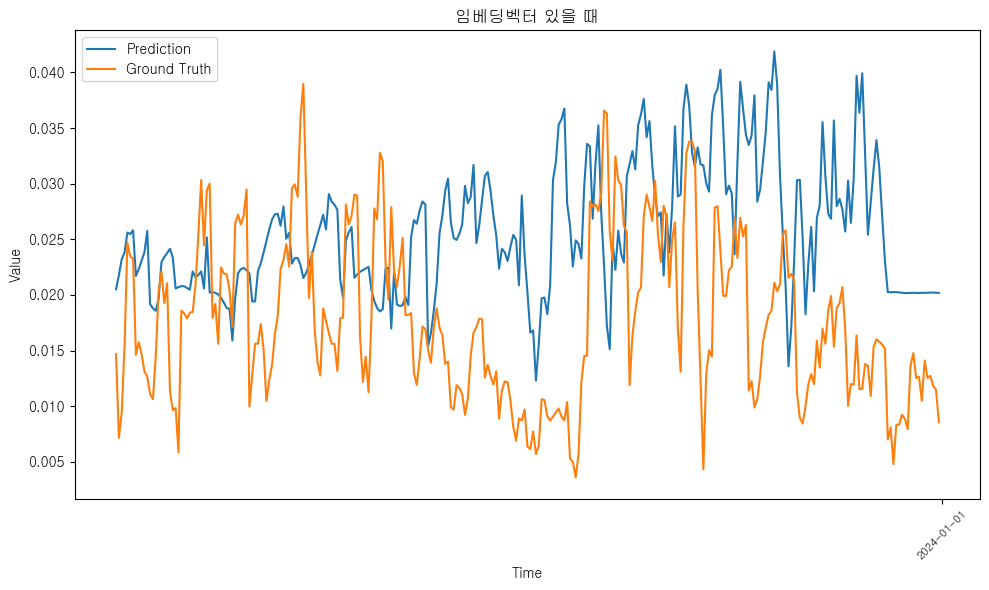

In [41]:
plt.figure(figsize=(10,6))

plt.plot( pred2['Predictions'], label='Prediction')
plt.plot( pred2['Ground Truths'],label='Ground Truth')
plt.title('임베딩벡터 있을 때')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45, fontsize=8)
plt.xticks(pd.date_range(start=pred2.index.min(), end=pred2.index.max(), freq='1YS').strftime('%Y-%m-%d'))
plt.tight_layout()
plt.show()